## Part I: 
Will a new airbnb user end up booking a destination? True or False.

In [1]:
%store -r X_train1
%store -r X_test1
%store -r y_train1
%store -r y_test1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import category_encoders as ce

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier


### EDA

How many first time users are completing a booking? 

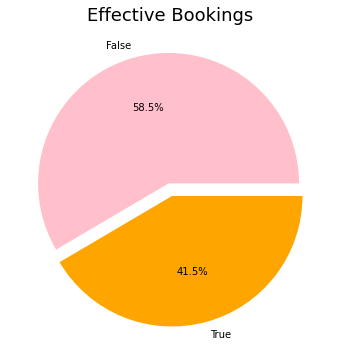

In [3]:
eff_booking = y_train1.value_counts(normalize=True)
pie, ax = plt.subplots(figsize=[8,6])
labels = eff_booking.keys()
plt.pie(x=eff_booking, autopct="%.1f%%", explode=[0.05]*2, labels=labels, colors=['pink', 'orange'])
plt.title("Effective Bookings", fontsize=18);
pie.savefig("effective.png")

How many of these users have English as their preferred language?

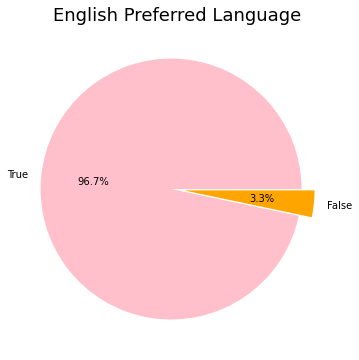

In [4]:
english_lan = X_train1['english_lan'].value_counts()
pie, ax = plt.subplots(figsize=[8,6])
labels = english_lan.keys()
plt.pie(x=english_lan, autopct="%.1f%%", explode=[0.05]*2, labels=labels, colors=['pink', 'orange'])
plt.title("English Preferred Language", fontsize=18);
pie.savefig("English.png")

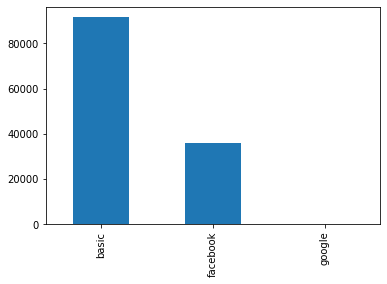

In [5]:
signup = X_train1.signup_method.value_counts()
signup.plot.bar()
plt.show()

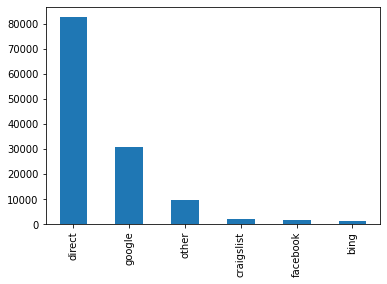

In [6]:
provider = X_train1.affiliate_provider.value_counts()
provider.plot.bar()
plt.show()

In [7]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128070 entries, 26776 to 121958
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   128070 non-null  object
 1   gender               128070 non-null  object
 2   signup_method        128070 non-null  object
 3   affiliate_channel    128070 non-null  object
 4   affiliate_provider   128070 non-null  object
 5   signup_app           128070 non-null  object
 6   first_device_type    128070 non-null  object
 7   first_browser        128070 non-null  object
 8   country_destination  128070 non-null  object
 9   english_lan          128070 non-null  bool  
 10  age_bins             128070 non-null  object
dtypes: bool(1), object(10)
memory usage: 10.9+ MB


### Data Preprocessing for Modeling

In [8]:
X_train1 = X_train1.drop(columns=['id', 'affiliate_provider', 'signup_app', 'english_lan',
                                  'country_destination',  'first_browser'])
X_test1 = X_test1.drop(columns=['id', 'affiliate_provider', 'signup_app', 'english_lan',
                               'country_destination', 'first_browser'])

In [9]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128070 entries, 26776 to 121958
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   gender             128070 non-null  object
 1   signup_method      128070 non-null  object
 2   affiliate_channel  128070 non-null  object
 3   first_device_type  128070 non-null  object
 4   age_bins           128070 non-null  object
dtypes: object(5)
memory usage: 5.9+ MB


In [10]:
le = LabelEncoder()
ohe = OneHotEncoder()
classifier = DecisionTreeClassifier(random_state=10)

In [11]:
# Label encoding
y_train_le = le.fit_transform(y_train1)
y_test_le = le.transform(y_test1)

In [12]:
# One hot encoding
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
X_train_ohe = ohe.fit_transform(X_train1)
X_train_ohe.head()

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,gender_FEMALE,gender_MALE,gender_UNKNOWN,gender_OTHER,signup_method_facebook,signup_method_basic,signup_method_google,affiliate_channel_direct,affiliate_channel_sem-brand,affiliate_channel_sem-non-brand,...,age_bins_40-44,age_bins_25-29,age_bins_45-49,age_bins_30-34,age_bins_69-74,age_bins_55-59,age_bins_20-24,age_bins_65-69,age_bins_59-64,age_bins_75+
26776,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
50538,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
191813,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
191918,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
190726,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_test_ohe = ohe.transform(X_test1)
X_test_ohe.head()

,gender_FEMALE,gender_MALE,gender_UNKNOWN,gender_OTHER,signup_method_facebook,signup_method_basic,signup_method_google,affiliate_channel_direct,affiliate_channel_sem-brand,affiliate_channel_sem-non-brand,...,age_bins_40-44,age_bins_25-29,age_bins_45-49,age_bins_30-34,age_bins_69-74,age_bins_55-59,age_bins_20-24,age_bins_65-69,age_bins_59-64,age_bins_75+
153649,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
161993,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
81536,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
36756,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
74429,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## RandomForest

We aim at predicting users who will end up booking. So here we want to focus on obtaining  a high score of True Positive 

In [19]:
#functionalize model results
def model_results(forest, X_train_ohe, y_train_le, X_test_ohe, y_test_le):
    
    # Training accuracy score
    print("Training Accuracy for Random Forest: {:.4}%".format(forest.score(X_train_ohe, y_train_le) * 100))

    # Test accuracy score
    print("Test Accuracy for Random Forest: {:.4}%".format(forest.score(X_test_ohe, y_test_le) * 100))

    forest_pred = forest.predict(X_test_ohe)
    
    # Plot feature importances   
    importances = pd.Series(forest.feature_importances_, index=X_train_ohe.columns)
    importances = importances.sort_values(ascending=True).tail(20)
    
    importances.plot(kind='barh')
    plt.show()
    

    # Classification report
    print(classification_report(y_test_le, forest_pred))

    #Confusion Matrix
    plot_confusion_matrix(forest, X_test_ohe, y_test_le, cmap='Purples', #values_format='d', 
                          normalize='true')
    plt.title('Random Forest')
    plt.show()

* First Attempt

In [53]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=25, max_depth=4, random_state=20)
forest.fit(X_train_ohe, y_train_le)

RandomForestClassifier(max_depth=4, n_estimators=25, random_state=20)

Training Accuracy for Random Forest: 66.69%
Test Accuracy for Random Forest: 66.79%


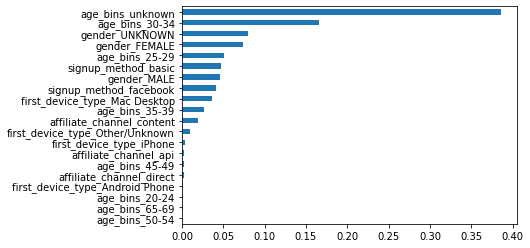

              precision    recall  f1-score   support

           0       0.68      0.82      0.74     49665
           1       0.64      0.46      0.54     35716

    accuracy                           0.67     85381
   macro avg       0.66      0.64      0.64     85381
weighted avg       0.66      0.67      0.66     85381



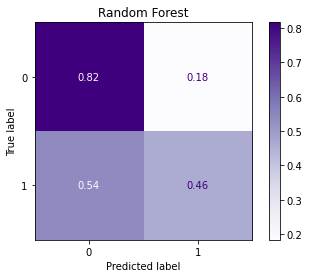

In [52]:
#obtain model results
model_results(forest, X_train_ohe, y_train_le, X_test_ohe, y_test_le)

In [ ]:
#Addressing Class Imbalance

* Second Attempt

In [49]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=25, class_weight='balanced', max_depth=4, random_state=20)
forest.fit(X_train_ohe, y_train_le)

RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=25,
                       random_state=20)

Training Accuracy for Random Forest: 64.72%
Test Accuracy for Random Forest: 64.89%


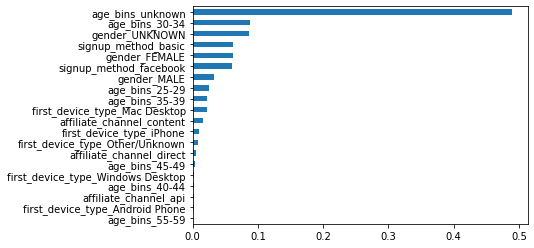

              precision    recall  f1-score   support

           0       0.76      0.58      0.66     49665
           1       0.56      0.75      0.64     35716

    accuracy                           0.65     85381
   macro avg       0.66      0.66      0.65     85381
weighted avg       0.68      0.65      0.65     85381



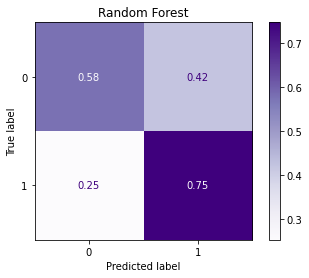

In [50]:
model_results(forest, X_train_ohe, y_train_le, X_test_ohe, y_test_le)

* Number of true positives icreases significantly. 

### Conclusion:

* Because we are dealing with first time users, most important categories are often 'Unknown'.
* Invest in Facebook Ads.
* The model correctly predicts 75% of users who completed a booking. This is useful for targeted marketing. 